In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D
from keras.callbacks import EarlyStopping

In [2]:
X = np.load("/kaggle/input/60x60-npy-dataset/pixel_value_array.npy")
Y = np.load("/kaggle/input/60x60-npy-dataset/label.npy")

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=7)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=8)

In [13]:
model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5,5),padding = 'same', activation ='relu', input_shape = (60,60,3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)
model.add(AveragePooling2D(pool_size=(2,2)))
print("Output: ", model.output_shape)
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'valid', activation ='relu'))
print("Output: ", model.output_shape)
model.add(AveragePooling2D(pool_size=(2,2)))
print("Output: ", model.output_shape)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'valid', activation ='relu'))
print("Output: ", model.output_shape)
model.add(Flatten())
print("Output: ", model.output_shape)
model.add(Dense(120, activation = "relu"))
print("Output: ", model.output_shape)
model.add(Dropout(0.3))
print("Output: ", model.output_shape)
model.add(Dense(2, activation = "softmax"))
print("Output: ", model.output_shape)

Input:  (None, 60, 60, 3)
Output:  (None, 60, 60, 6)
Output:  (None, 30, 30, 6)
Output:  (None, 26, 26, 16)
Output:  (None, 13, 13, 16)
Output:  (None, 9, 9, 64)
Output:  (None, 5184)
Output:  (None, 120)
Output:  (None, 120)
Output:  (None, 2)


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          25664     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)              

In [15]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [16]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=1,restore_best_weights=True, mode='min')

In [17]:
batch_size=150
epochs=50
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_test, Y_test), verbose = 2, callbacks=[early_stopping])

Epoch 1/50
57/57 - 5s - loss: 0.5779 - accuracy: 0.7088 - val_loss: 0.5381 - val_accuracy: 0.7562
Epoch 2/50
57/57 - 4s - loss: 0.5185 - accuracy: 0.7616 - val_loss: 0.5021 - val_accuracy: 0.7575
Epoch 3/50
57/57 - 4s - loss: 0.4890 - accuracy: 0.7772 - val_loss: 0.4752 - val_accuracy: 0.7769
Epoch 4/50
57/57 - 4s - loss: 0.4712 - accuracy: 0.7870 - val_loss: 0.4560 - val_accuracy: 0.7896
Epoch 5/50
57/57 - 4s - loss: 0.4561 - accuracy: 0.7983 - val_loss: 0.4451 - val_accuracy: 0.7929
Epoch 6/50
57/57 - 4s - loss: 0.4531 - accuracy: 0.7992 - val_loss: 0.4364 - val_accuracy: 0.7989
Epoch 7/50
57/57 - 4s - loss: 0.4396 - accuracy: 0.8084 - val_loss: 0.4286 - val_accuracy: 0.8049
Epoch 8/50
57/57 - 4s - loss: 0.4365 - accuracy: 0.8085 - val_loss: 0.4261 - val_accuracy: 0.8069
Epoch 9/50
57/57 - 4s - loss: 0.4340 - accuracy: 0.8074 - val_loss: 0.4558 - val_accuracy: 0.7963
Epoch 10/50
57/57 - 4s - loss: 0.4261 - accuracy: 0.8114 - val_loss: 0.4282 - val_accuracy: 0.8016
Epoch 11/50
57/57 -

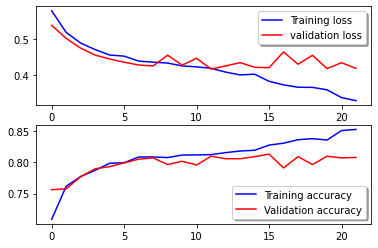

In [18]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [19]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)
print(confusion_matrix(Y_true, Y_pred_classes))

[[1204  296]
 [ 186  809]]


In [20]:
score = metrics.precision_score(Y_true,Y_pred_classes, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(Y_true, Y_pred_classes, average= "weighted")
print("Recall score: {}".format(score))
score_f1 = metrics.f1_score(Y_true, Y_pred_classes, average= "weighted")
print("F1 score: {}".format(score_f1))

Precision score: 0.8127241037627193
Recall score: 0.806813627254509
F1 score: 0.8081967130834414
